In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
foothill = np.load('../dataset/foothill/velocity_model/foothill.npy').squeeze()  # (70, 190)
bpsalt = np.load('../dataset/bpsalt/velocity_model/bpsalt.npy').squeeze()        # (70, 190)
marmousi = np.load('../dataset/marmousi/velocity_model/marmousi.npy').squeeze()  # (70, 190)
overthrust = np.load('../dataset/overthrust/velocity_model/overthrust.npy').squeeze()  # (70, 190)

print(f'Foothill:   {foothill.shape}, [{foothill.min():.0f}, {foothill.max():.0f}] m/s')
print(f'BP Salt:    {bpsalt.shape}, [{bpsalt.min():.0f}, {bpsalt.max():.0f}] m/s')
print(f'Marmousi:   {marmousi.shape}, [{marmousi.min():.0f}, {marmousi.max():.0f}] m/s')
print(f'Overthrust: {overthrust.shape}, [{overthrust.min():.0f}, {overthrust.max():.0f}] m/s')

Foothill:   (70, 190), [1500, 4500] m/s
BP Salt:    (70, 190), [1500, 4500] m/s
Marmousi:   (70, 190), [1500, 4500] m/s
Overthrust: (70, 190), [1500, 4500] m/s


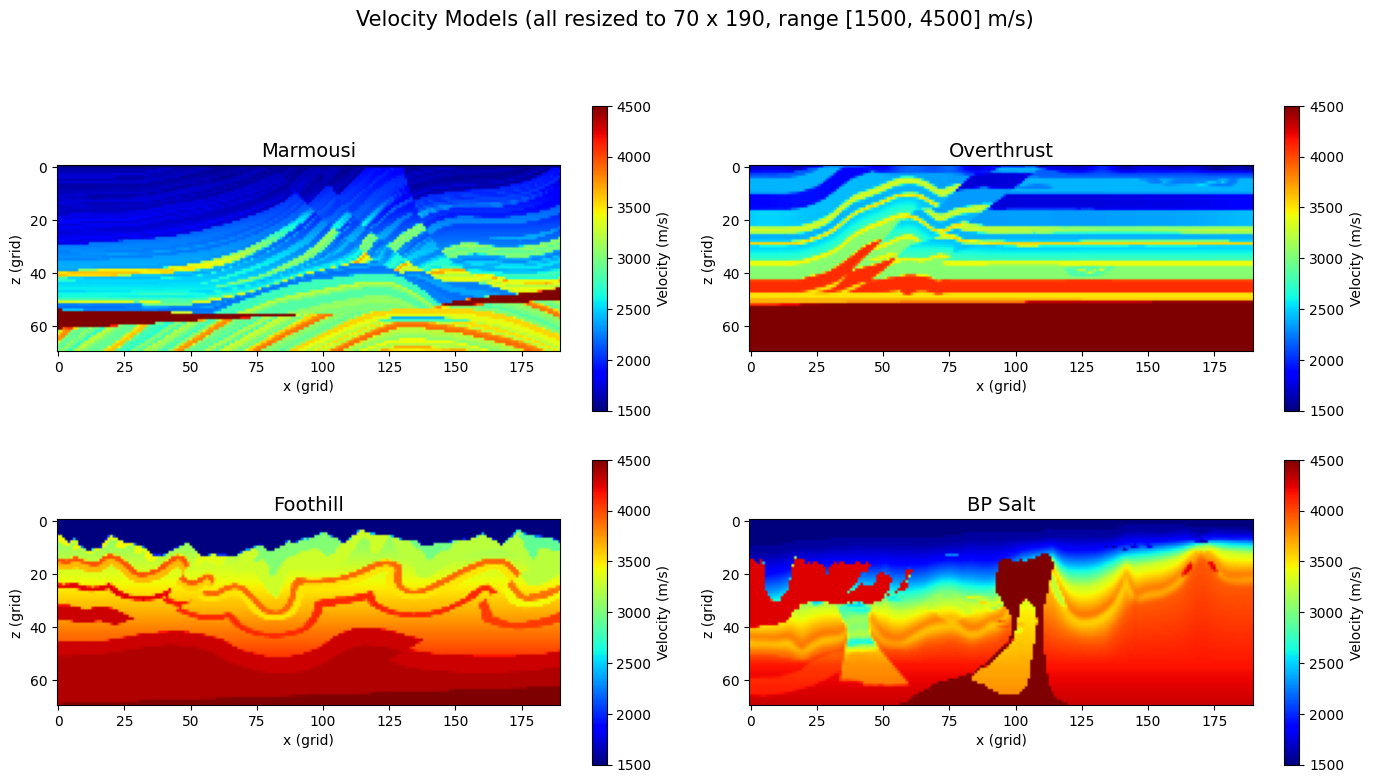

In [6]:
models = [
    ('Marmousi', marmousi),
    ('Overthrust', overthrust),
    ('Foothill', foothill),
    ('BP Salt', bpsalt),
]

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
for ax, (name, vel) in zip(axes.flat, models):
    im = ax.imshow(vel, aspect='equal', cmap='jet', vmin=1500, vmax=4500)
    ax.set_title(name, fontsize=14)
    ax.set_xlabel('x (grid)')
    ax.set_ylabel('z (grid)')
    plt.colorbar(im, ax=ax, label='Velocity (m/s)', shrink=0.8)

plt.suptitle('Velocity Models (all resized to 70 x 190, range [1500, 4500] m/s)', fontsize=15, y=1.01)
plt.tight_layout()
plt.show()

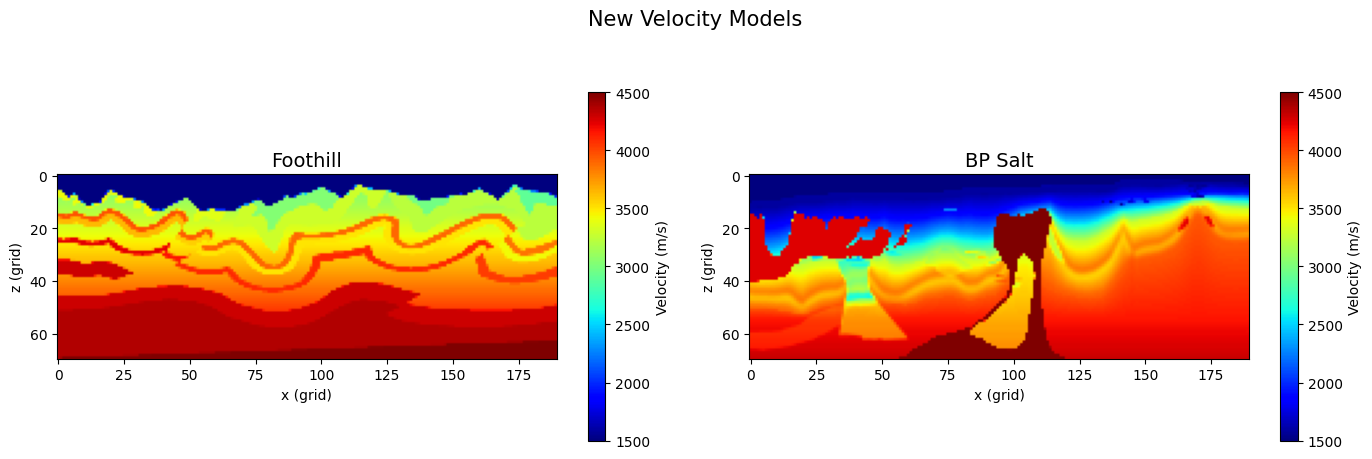

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for ax, (name, vel) in zip(axes, [('Foothill', foothill), ('BP Salt', bpsalt)]):
    im = ax.imshow(vel, aspect='equal', cmap='jet', vmin=1500, vmax=4500)
    ax.set_title(name, fontsize=14)
    ax.set_xlabel('x (grid)')
    ax.set_ylabel('z (grid)')
    plt.colorbar(im, ax=ax, label='Velocity (m/s)', shrink=0.8)

plt.suptitle('New Velocity Models', fontsize=15)
plt.tight_layout()
plt.show()

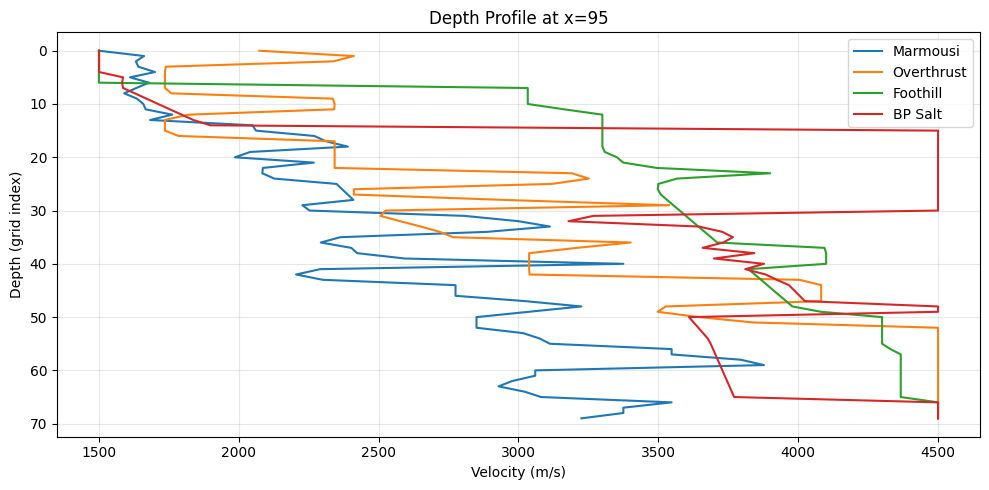

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))
mid_x = 95  # middle column
for name, vel in models:
    ax.plot(vel[:, mid_x], np.arange(vel.shape[0]), label=name)
ax.invert_yaxis()
ax.set_xlabel('Velocity (m/s)')
ax.set_ylabel('Depth (grid index)')
ax.set_title(f'Depth Profile at x={mid_x}')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()